In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets, tree, linear_model, metrics
from sklearn.model_selection import cross_val_score, train_test_split
import itertools
from itertools import permutations
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# 1. Data Import & Cleaning

In [3]:
#1. Import Data
data =  pd.read_csv('wdbc.data', sep=",",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#2. Fix the column names
features=['radius','texture','perimeter','area','smoothness','compactness','concavity','concave points','symmetry','fractal dimension']
atr=['mean','standard error','largest']
column1 = ['ID','Diagnosis']
column2 = list(itertools.product(features,atr))
for i in range(len(column2)):
    column2[i]='-'.join(column2[i])
column1.extend(column2)
data.columns=column1
data.head(3)


,ID,Diagnosis,radius-mean,radius-standard error,radius-largest,texture-mean,texture-standard error,texture-largest,perimeter-mean,perimeter-standard error,...,concavity-largest,concave points-mean,concave points-standard error,concave points-largest,symmetry-mean,symmetry-standard error,symmetry-largest,fractal dimension-mean,fractal dimension-standard error,fractal dimension-largest
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [5]:
#3. Data Describtion: there's no NA value within the dataframe
data.isna().sum()
data.describe()

,ID,radius-mean,radius-standard error,radius-largest,texture-mean,texture-standard error,texture-largest,perimeter-mean,perimeter-standard error,perimeter-largest,...,concavity-largest,concave points-mean,concave points-standard error,concave points-largest,symmetry-mean,symmetry-standard error,symmetry-largest,fractal dimension-mean,fractal dimension-standard error,fractal dimension-largest
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# 2. Performance Metric

Given that the consequence of not identifying maligant case is also serious, I want to also take **Recall** into account and therefore choose the **F-measure(maligant)** as our performance matric.

# 3. Decision Tree  
* I am going to tune the **max_depth** hyper-parameter to see the effect of underfitting and overfitting.
* I will split **10%** of the data out as my test data.

In [6]:
target=np.where(data['Diagnosis']=='M',1,0)
features=data.iloc[:,2:]
X_train, X_test, y_train, y_test=train_test_split(features,target, test_size=0.2,random_state=99)

Here, I try to use **cross vaidation and grid search** to find the best hyperparameter for Decision Tree model.

In [7]:
param_grid = {'criterion':['gini','entropy'],'max_depth':list(range(1,21))}
grid = GridSearchCV(tree.DecisionTreeClassifier(random_state=10), param_grid, cv = 10, scoring = 'f1')
grid.fit(X_train,y_train)
print ("Best Model's F1-Positive Score on Train Data: {}%".format(round(grid.best_score_*100,2)))
print ("With CV grid search, I found the best hyperparameter is criterion={} and max_depth={}.".format(grid.best_params_['criterion'],grid.best_params_['max_depth']))
print("Prediction F1-Positive Score on Test Data: {}%".format(round(metrics.f1_score(y_test, grid.predict(X_test))*100,2)))

Best Model's F1-Positive Score on Train Data: 93.26%
With CV grid search, I found the best hyperparameter is criterion=entropy and max_depth=4.
Prediction F1-Positive Score on Test Data: 87.67%


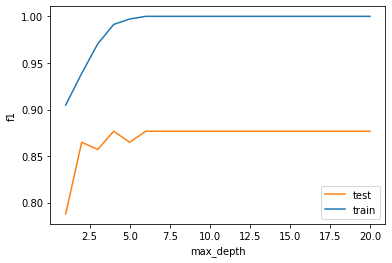

In [11]:
f1_train=[]
f1_test=[]
for i in range(1,21):
    clf = tree.DecisionTreeClassifier(criterion=grid.best_params_['criterion'],max_depth =i,random_state=10)
    clf.fit(X_train,y_train)
    f1_train.append(metrics.f1_score(y_train,clf.predict(X_train)))
    f1_test.append(metrics.f1_score(y_test,clf.predict(X_test)))

max_depth=list(range(1,21))
line1, =plt.plot(max_depth,f1_train,label='train')
line2, =plt.plot(max_depth,f1_test,label='test')
plt.xlabel("max_depth")
plt.ylabel("f1")
plt.legend((line2, line1), ('test', 'train'))
plt.show()

Given that when **max_depth<3**, both train and test data do not perform too well, so the model is probably **underfitting**. On the other hand, when the max_depth is smaller than 10, there isn't apparent pattern of overfitting.

# 4. Logistic Regression  
* I am going to tune the hyper parameter **C (the inverse of regularization strength)** to see the effect of underfitting and overfitting. The smaller the c is the the more intense the regularization is.  
* I will also split **10%** of the data out as my test data

Here, I try to use **cross vaidation and grid search** to find the best hyperparameter for Logistic Regression model.

In [112]:
normalized_features=(features-features.min())/(features.max()-features.min())
X_train, X_test, y_train, y_test=train_test_split(normalized_features,target, test_size=0.2,random_state=99)
param_grid = {'C':[2,1.9,1.8,1.7,1.6,1.5,1.4,1.3,1.2,1.1,1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]}
grid = GridSearchCV(linear_model.LogisticRegression(solver='saga',l1_ratio=0.5,random_state=10,penalty='elasticnet'), param_grid, cv = 10, scoring = 'f1')
grid.fit(X_train,y_train)
print ("Best Model's F1-Positive Score on Train Data: {}%".format(round(grid.best_score_*100,2)))
print ("With CV grid search, I found the best hyperparameter is C={}.".format(grid.best_params_['C']))
print("Prediction F1-Positive Score on Test Data: {}%".format(round(metrics.f1_score(y_test, grid.predict(X_test))*100,2)))

Best Model's F1-Positive Score on Train Data: 95.8%
With CV grid search, I found the best hyperparameter is C=2.
Prediction F1-Positive Score on Test Data: 95.89%


With regularization, some features are discriminated and eventually have coefficeints equal to 0.

In [126]:
best_model=grid.best_estimator_
best_model.coef_.T

array([[ 2.21502065],
       [ 2.43416955],
       [ 2.15692162],
       [ 1.86877042],
       [ 0.59736962],
       [ 0.        ],
       [ 1.53505621],
       [ 3.03442944],
       [ 0.11690881],
       [-0.7464025 ],
       [ 2.13051211],
       [ 0.        ],
       [ 1.44379433],
       [ 0.92521458],
       [ 0.        ],
       [-0.75434628],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [-0.39040489],
       [ 3.16433488],
       [ 3.0140817 ],
       [ 2.8571796 ],
       [ 2.15333802],
       [ 2.54331356],
       [ 0.50021648],
       [ 1.32246731],
       [ 3.7510223 ],
       [ 1.76060078],
       [ 0.16839529]])

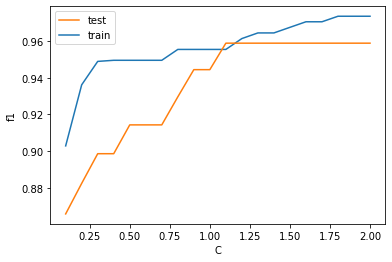

In [19]:
f1_train=[]
f1_test=[]
for i in [2,1.9,1.8,1.7,1.6,1.5,1.4,1.3,1.2,1.1,1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]:
    clf = linear_model.LogisticRegression(C=i,multi_class='ovr',solver='saga',l1_ratio=0.5,random_state=10,penalty='elasticnet')
    clf.fit(X_train,y_train)
    f1_train.append(metrics.f1_score(y_train,clf.predict(X_train)))
    f1_test.append(metrics.f1_score(y_test,clf.predict(X_test)))

C=[2,1.9,1.8,1.7,1.6,1.5,1.4,1.3,1.2,1.1,1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
line1, =plt.plot(C,f1_train,label='train')
line2, =plt.plot(C,f1_test,label='test')
plt.xlabel("C")
plt.ylabel("f1")
plt.legend((line2, line1), ('test', 'train'))
plt.show()

When **C < 0.75**, the performances of test data and train data are both bad. Thus, the model is probably **underfitting**. On the other hand, when **C > 1.25**, the model starts to **overfit**.

# 5. KNN
* I am going to tune the hyper-parameter **n-neighbors** to see the effect of overfitting and underfitting
* Given that the KNN method is built based on data and does not have a model, I am not going to split the data.

In [14]:
normalized_features=(features-features.min())/(features.max()-features.min())
X_train, X_test, y_train, y_test=train_test_split(normalized_features,target, test_size=0.2,random_state=99)

Here, I try to use **cross vaidation and grid search** to find the best hyperparameter for KNN model.

In [15]:
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]
param_grid={'n_neighbors':k_range,'weights':weight_options}
grid = GridSearchCV(neighbors.KNeighborsClassifier(), param_grid, cv = 10, scoring = 'f1')
grid.fit(X_train,y_train)
print ("Best Model's F1-Positive Score on Train Data: {}%".format(round(grid.best_score_*100,2)))
print ("With CV grid search, I found the best hyperparameter is weights={} and n_neighbors={}.".format(grid.best_params_['weights'],grid.best_params_['n_neighbors']))
print("Prediction F1-Positive Score on Test Data: {}%".format(round(metrics.f1_score(y_test, grid.predict(X_test))*100,2)))


Best Model's F1-Positive Score on Train Data: 95.78%
With CV grid search, I found the best hyperparameter is weights=distance and n_neighbors=12.
Prediction F1-Positive Score on Test Data: 92.96%


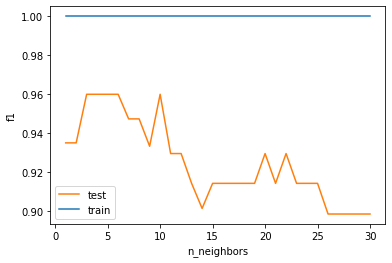

In [18]:
f1_train=[]
f1_test=[]
for i in range(1,31):
    knn = neighbors.KNeighborsClassifier(i, weights=grid.best_params_['weights'])
    knn.fit(X_train,y_train)
    f1_train.append(metrics.f1_score(y_train,knn.predict(X_train)))
    f1_test.append(metrics.f1_score(y_test,knn.predict(X_test)))

n_neighbors=list(range(1,31))
line1, =plt.plot(n_neighbors,f1_train,label='train')
line2, =plt.plot(n_neighbors,f1_test,label='test')
plt.xlabel("n_neighbors")
plt.ylabel("f1")
plt.legend((line2, line1), ('test', 'train'))
plt.show()

When **n_neighbor<4**, the model has **overfitting** issue. On the other hand, when **n_neighbors > 10**, the model is underfitting for **test data**.